<a href="https://colab.research.google.com/github/DeeeTeeee/AZUBISTORE/blob/master/time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
import datetime as dt
import squarify


In [342]:
# For CSV, use pandas.read_csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [343]:
#Loading all datasets
holiday = pd.read_csv('/content/drive/MyDrive/lp2/holidays_events.csv',parse_dates=["date"])
oil = pd.read_csv('/content/drive/MyDrive/lp2/oil.csv',parse_dates=["date"])
stores = pd.read_csv('/content/drive/MyDrive/lp2/stores.csv')
test = pd.read_csv('/content/drive/MyDrive/lp2/test.csv',index_col=["date"],parse_dates=["date"])
train = pd.read_csv('/content/drive/MyDrive/lp2/train.csv',index_col=["date"],parse_dates=['date'])
transactions = pd.read_csv('/content/drive/MyDrive/lp2/transactions.csv',parse_dates=["date"])
sample_submission = pd.read_csv('/content/drive/MyDrive/lp2/sample_submission.csv')

# Exploratory Data Analysis: EDA
## Univariate Analysis and Multivariate Analysis
Dataframes

In [344]:
# Print out the shapes of the datasets
print(f"The shape of the holiday dataset is: {holiday.shape}")
print(f"The shape of the oil dataset is: {oil.shape}")
print(f"The shape of the stores dataset is: {stores.shape}")
print(f"The shape of the test dataset is: {test.shape}")
print(f"The shape of the train dataset is: {train.shape}")
print(f"The shape of the transactions dataset is: {transactions.shape}")
print(f"The shape of the sample_submission dataset is: {sample_submission.shape}")

The shape of the holiday dataset is: (350, 6)
The shape of the oil dataset is: (1218, 2)
The shape of the stores dataset is: (54, 5)
The shape of the test dataset is: (28512, 4)
The shape of the train dataset is: (3000888, 5)
The shape of the transactions dataset is: (83488, 3)
The shape of the sample_submission dataset is: (28512, 2)


In [345]:
# Print the data types of each dataset
def show_data_type(dataset_name, dataset):
    print(f"Data types for {dataset_name}:")
    print(dataset.dtypes)
    print('_' * 50)
        
show_data_type('Stores', stores)
show_data_type('Train', train)
show_data_type('Test', test)
show_data_type('Transactions', transactions)
show_data_type('Oil', oil)
show_data_type('Holiday', holiday)
show_data_type('Sample_Submission', sample_submission)



Data types for Stores:
store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object
__________________________________________________
Data types for Train:
id               int64
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
__________________________________________________
Data types for Test:
id              int64
store_nbr       int64
family         object
onpromotion     int64
dtype: object
__________________________________________________
Data types for Transactions:
date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object
__________________________________________________
Data types for Oil:
date          datetime64[ns]
dcoilwtico           float64
dtype: object
__________________________________________________
Data types for Holiday:
date           datetime64[ns]
type                   object
locale                

In [346]:
#checking for the summary of the datasets:
datasets = {'holiday': holiday, 'oil': oil, 'stores': stores, 'train': train, 'test': test, 'transactions': transactions, 'sample_submission' : sample_submission}

for name, data in datasets.items():
    print(f"\n{name.capitalize()} dataset summary statistics:\n")
    print(data.describe())
    print('_' * 50)


Holiday dataset summary statistics:

                       date     type    locale locale_name description  \
count                   350      350       350         350         350   
unique                  312        6         3          24         103   
top     2014-06-25 00:00:00  Holiday  National     Ecuador    Carnaval   
freq                      4      221       174         174          10   
first   2012-03-02 00:00:00      NaN       NaN         NaN         NaN   
last    2017-12-26 00:00:00      NaN       NaN         NaN         NaN   

       transferred  
count          350  
unique           2  
top          False  
freq           338  
first          NaN  
last           NaN  
__________________________________________________

Oil dataset summary statistics:

        dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000
________________________________________

In [347]:
# showing missing values in all dataset using a function

datasets = {'stores': stores, 'train': train, 'test': test, 'transactions': transactions, 'oil': oil, 'holiday': holiday, 'sample_submission' : sample_submission}

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in {name} dataset:")
        print(data.isnull().sum())
        print('_' * 50)

show_missing_values(datasets)


Missing values in stores dataset:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
__________________________________________________
Missing values in train dataset:
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
__________________________________________________
Missing values in test dataset:
id             0
store_nbr      0
family         0
onpromotion    0
dtype: int64
__________________________________________________
Missing values in transactions dataset:
date            0
store_nbr       0
transactions    0
dtype: int64
__________________________________________________
Missing values in oil dataset:
date           0
dcoilwtico    43
dtype: int64
__________________________________________________
Missing values in holiday dataset:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
____________________________________________

*   We can see that only the oil dataset have missing values

lets work on that:




In [348]:
# Fill missing values with the mean value of the column
oil['dcoilwtico'].fillna(oil['dcoilwtico'].mean(), inplace=True)

In [349]:
# Print the missing values in the dataset again to confirm that there are no missing values left
print(oil.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


# **Merging all datasets for further EDA**

In [350]:
# combine the datasets on common columns one after the other
merged_data1 = pd.merge(train, transactions, on=['date', 'store_nbr'])
merged_data2 = pd.merge(merged_data1, holiday, on='date')
merged_data3 = pd.merge(merged_data2, oil, on='date')
merged_data = pd.merge(merged_data3, stores, on='store_nbr')

In [371]:
merged_data.head()

,date,id,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,year
0,2013-01-01,561,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1,2013
1,2013-01-01,562,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1,2013
2,2013-01-01,563,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1,2013
3,2013-01-01,564,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1,2013
4,2013-01-01,565,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1,2013


we notice some column names like type_x, type_y..lets work on this by renaming them

In [352]:
merged_data = merged_data.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})
merged_data.head()

,date,id,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,2013-01-01,561,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1
1,2013-01-01,562,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1
2,2013-01-01,563,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1
3,2013-01-01,564,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1
4,2013-01-01,565,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,67.714366,Salinas,Santa Elena,D,1


In [353]:
# Show info of merged_data
print("Info of merged_data:\n")
merged_data.info()
print('_' * 50)

# Show missing values in merged_data
print("\nMissing values in merged_data:\n")
print(merged_data.isna().sum())
print('_' * 50)

# Show shape of merged_data
print("\nShape of merged_data:", merged_data.shape)
print('_' * 50)

# Show describe of merged_data
print("\nDescribe of merged_data:\n")
print(merged_data.describe().T)
print('_' * 50)

# Show duplicated values in merged_data
print("\nDuplicated values in merged_data:", merged_data.duplicated().sum())      


Info of merged_data:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          322047 non-null  datetime64[ns]
 1   id            322047 non-null  int64         
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   transactions  322047 non-null  int64         
 7   holiday_type  322047 non-null  object        
 8   locale        322047 non-null  object        
 9   locale_name   322047 non-null  object        
 10  description   322047 non-null  object        
 11  transferred   322047 non-null  bool          
 12  dcoilwtico    322047 non-null  float64       
 13  city          322047 non-null  object        
 14  state         322047 non-null  object        


In [354]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,322047.0,1.682979e+06,786249.257767,561.00,1010616.50,1842406.00,2.209556e+06,3000887.00
store_nbr,322047.0,2.699467e+01,15.595174,1.00,13.00,27.00,4.000000e+01,54.00
sales,322047.0,4.063835e+02,1246.881240,0.00,1.00,19.00,2.412605e+02,124717.00
onpromotion,322047.0,3.727136e+00,15.512095,0.00,0.00,0.00,1.000000e+00,716.00
transactions,322047.0,1.734118e+03,1050.335018,54.00,1030.00,1409.00,2.148000e+03,8359.00
dcoilwtico,322047.0,6.432683e+01,24.289114,27.96,44.94,52.72,9.312000e+01,107.95
cluster,322047.0,8.531202e+00,4.713809,1.00,4.00,9.00,1.300000e+01,17.00


# Let us Answer some **Questions**

1. Is the train dataset complete (has all the required dates)?

In [355]:
if train.isnull().sum().sum() == 0:
    print("The train dataset is complete.")
else:
    print("The train dataset is incomplete.")

The train dataset is complete.


In [356]:
# Create a date range from the first date to the last date in the series
date_range = pd.date_range(start=train.index.min(), end=train.index.max())

# Check if there are any dates in the range that are not in the index
missing_dates = date_range.difference(train.index)

if len(missing_dates) == 0:
    print("The time series is complete.")
else:
    print("The time series is not complete. The following dates are missing:")
    print(missing_dates)

The time series is not complete. The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


2. Which dates have the lowest and highest sales for each year?

In [357]:
merged_data['year'] = pd.to_datetime(merged_data['date']).dt.year

# Group merged_data by year and date
grouped_data = merged_data.groupby(['year', 'date'])

# Calculate total sales for each date
sales_by_date = grouped_data['sales'].sum()

# Sort sales_by_date in ascending and descending order
lowest_sales = sales_by_date.groupby('year').nsmallest(1)
highest_sales = sales_by_date.groupby('year').nlargest(1)

# Print dates with lowest and highest sales for each year
for year in merged_data['year'].unique():
    print("Year:", year)
    print("Lowest sales:", lowest_sales[year])
    print("Highest sales:", highest_sales[year])
    print("-" * 50)


Year: 2013
Lowest sales: year  date      
2013  2013-01-01    2511.618999
Name: sales, dtype: float64
Highest sales: year  date      
2013  2013-06-25    915358.590192
Name: sales, dtype: float64
--------------------------------------------------
Year: 2014
Lowest sales: year  date      
2014  2014-01-01    8602.065404
Name: sales, dtype: float64
Highest sales: year  date      
2014  2014-12-22    2.016287e+06
Name: sales, dtype: float64
--------------------------------------------------
Year: 2015
Lowest sales: year  date      
2015  2015-01-01    12773.61698
Name: sales, dtype: float64
Highest sales: year  date      
2015  2015-12-22    2.283724e+06
Name: sales, dtype: float64
--------------------------------------------------
Year: 2016
Lowest sales: year  date      
2016  2016-04-28    543339.849013
Name: sales, dtype: float64
Highest sales: year  date      
2016  2016-12-22    2.271699e+06
Name: sales, dtype: float64
--------------------------------------------------
Year: 2017
Lo

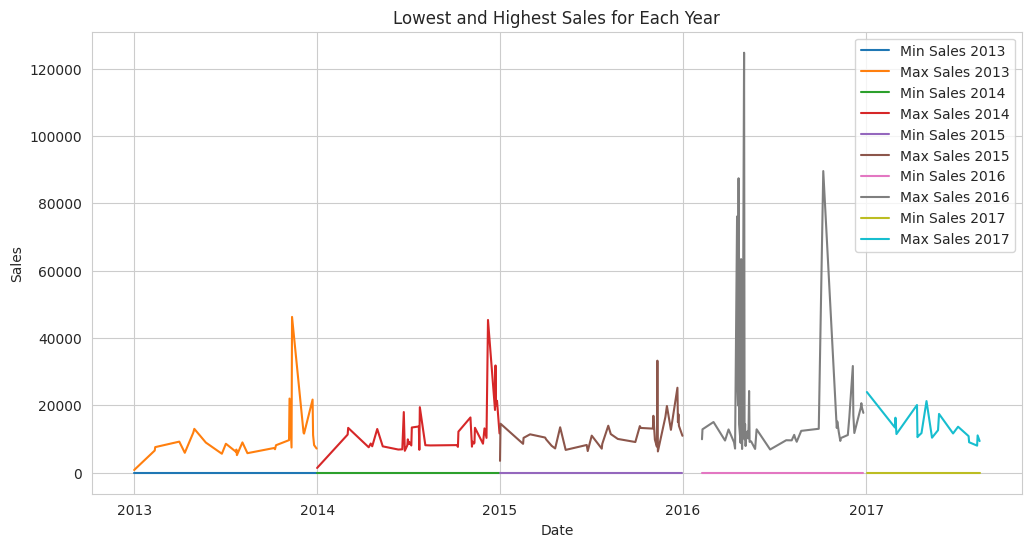

In [358]:
# Group the merged_data by year and date, and calculate the minimum and maximum sales for each date
sales_by_date = merged_data.groupby(['year', 'date'])['sales'].agg(['min', 'max'])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each year, and plot the minimum and maximum sales for each date as two lines
for year in sales_by_date.index.get_level_values('year').unique():
    data = sales_by_date.loc[year]
    ax.plot(data.index.get_level_values('date'), data['min'], label=f'Min Sales {year}')
    ax.plot(data.index.get_level_values('date'), data['max'], label=f'Max Sales {year}')

# Set the title, x-axis label, y-axis label, and legend
ax.set_title('Lowest and Highest Sales for Each Year')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()

# Display the chart
plt.show()

3. Did the earthquake impact sales?

A magnitude 7.8 earthquake struck Ecuador on **April 16, 2016**. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [359]:
merged_data[merged_data['date'] == '2016-04-16']['sales'].sum()


0.0

we can see that there was no sales recorded at all on this very day. meaning that the earthquake actually affected sales 

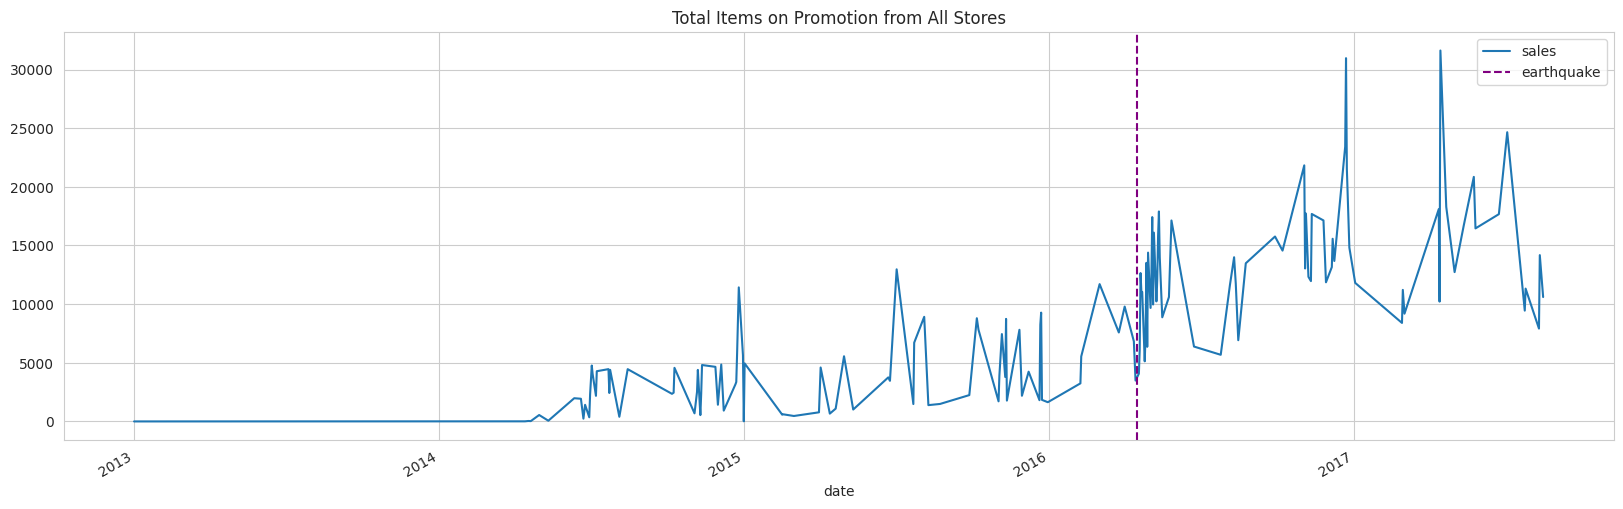

In [360]:
#define earthqueake
earthquake = [pd.to_datetime('2016-04-16')]

ax = merged_data.groupby(['date'], as_index=False)['onpromotion'].sum().plot(
    'date', 'onpromotion', figsize=(20,6), title='Total Items on Promotion from All Stores')
ax.axvline(earthquake, color='purple', linestyle='--')
ax.legend(['sales', 'earthquake']);

we can see that there was a drastic increase in sales immediately after the earthquake which lasted for some weeks

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

In [362]:
# merge the two datasets on the store_nbr column
merged = pd.merge(stores, transactions, on='store_nbr')

# group the merged dataset by cluster, city, state, and type and calculate the sum of transactions for each group
grouped = merged.groupby(['cluster', 'city', 'state', 'type'])['transactions'].sum()

# print the grouped data
print(grouped)


cluster  city           state                           type
1        Daule          Guayas                          D        2485687
         Guayaquil      Guayas                          D        3568206
         Salinas        Santa Elena                     D        1520362
2        Cuenca         Azuay                           D        3284365
3        El Carmen      Manabi                          C        1451290
         Guayaquil      Guayas                          C        2236356
         Machala        El Oro                          C        2181195
         Playas         Guayas                          C        1123889
         Quevedo        Los Rios                        C        1743003
         Santo Domingo  Santo Domingo de los Tsachilas  C        1464498
4        Loja           Loja                            D        2867052
         Machala        El Oro                          D        1764146
         Santo Domingo  Santo Domingo de los Tsachilas  D      

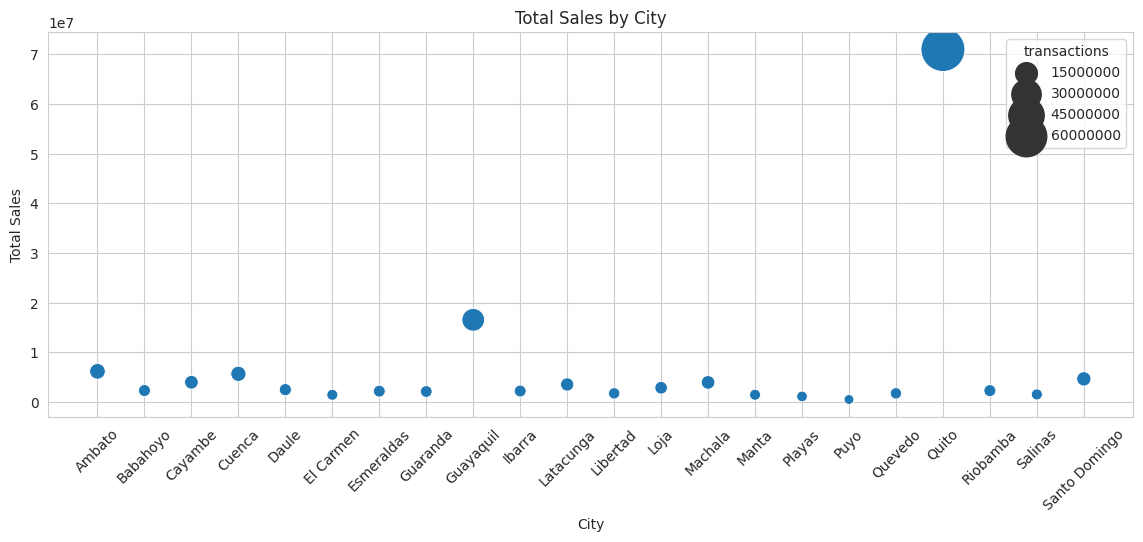

In [363]:
# Aggregate sales data by city
sales_by_city = merged.groupby('city')['transactions'].sum().reset_index()

# Create bubble plot
plt.figure(figsize=(14,5))
sns.scatterplot(x='city', y='transactions', size='transactions', sizes=(50, 1000), data=sales_by_city, palette='Set2')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


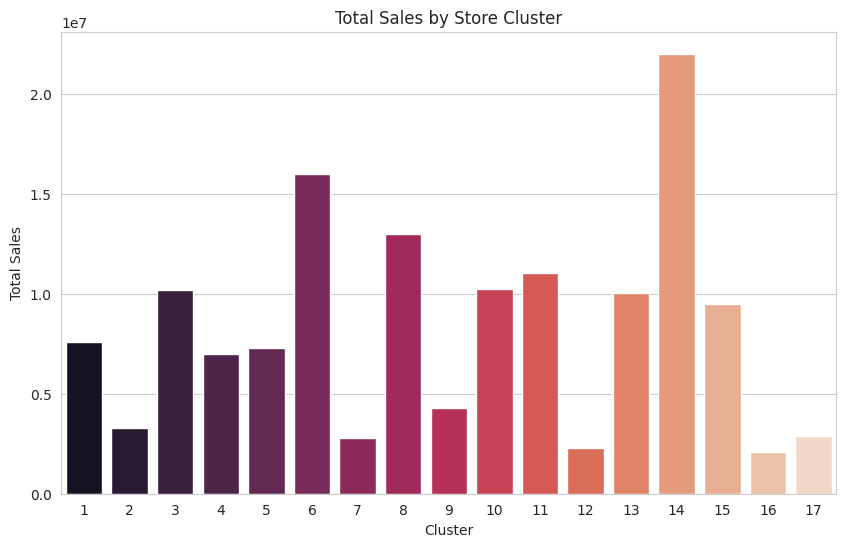

In [364]:


# Merge the two datasets on 'store_nbr'
merged_data_df1 = stores.merge(transactions, on='store_nbr')

# Aggregate sales data by cluster
sales_by_cluster = merged_data_df1.groupby('cluster')['transactions'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='cluster', y='transactions', data=sales_by_cluster, palette='rocket')
plt.title('Total Sales by Store Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.show()


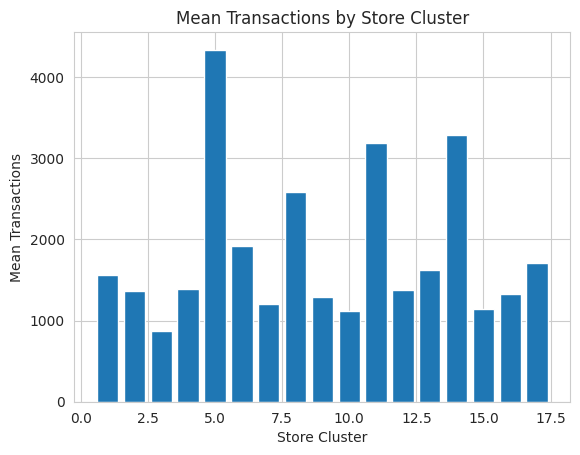

In [365]:
# Merge the two dataframes on store_nbr
merged_df1= pd.merge(transactions, stores, on="store_nbr")

# Group by cluster and calculate the mean transactions
grouped_df = merged_df.groupby("cluster")["transactions"].mean().reset_index()

# Create a bar chart
plt.bar(grouped_df["cluster"], grouped_df["transactions"])

# Add labels and title
plt.xlabel("Store Cluster")
plt.ylabel("Mean Transactions")
plt.title("Mean Transactions by Store Cluster")

# Show the plot
plt.show()

In [366]:

# Merge store and transaction datasets on store_nbr
merged_df = pd.merge(stores, transactions, on='store_nbr')

# Group merged dataset by state and sum transactions
state_transactions = merged_df.groupby('state')['transactions'].sum()

# Print state_transactions
print(state_transactions)


state
Azuay                              5673847
Bolivar                            2107489
Chimborazo                         2287850
Cotopaxi                           3531356
El Oro                             3945341
Esmeraldas                         2182356
Guayas                            21894000
Imbabura                           2209898
Loja                               2867052
Los Rios                           4049047
Manabi                             2906765
Pastaza                             504156
Pichincha                         74971545
Santa Elena                        1520362
Santo Domingo de los Tsachilas     4655266
Tungurahua                         6172615
Name: transactions, dtype: int64


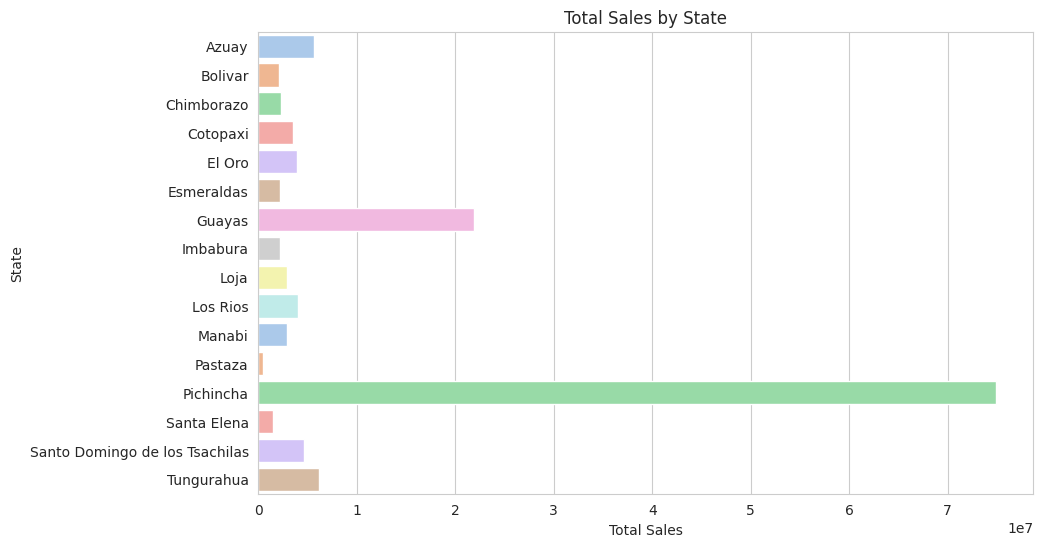

In [375]:
# Group stores by state and calculate total sales
sales_by_state = stores.merge(transactions, on='store_nbr', how='left').groupby('state')['transactions'].sum().reset_index()

# Transpose the sales_by_state dataframe
sales_by_state_transposed = sales_by_state.set_index('state').T

# Create a horizontal bar chart with Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_state_transposed, palette='pastel', orient='h')
plt.title('Total Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()


In [368]:

# merge the two datasets on store_nbr
#merged_df = pd.merge(stores, transactions, on='store_nbr')

# group by store type and sum the transactions for each group
type_transactions = merged_df.groupby('type')['transactions'].sum()

# print the results
print(type_transactions)


type
A    43215470
B    20384902
C    24788958
D    46230088
E     6859527
Name: transactions, dtype: int64


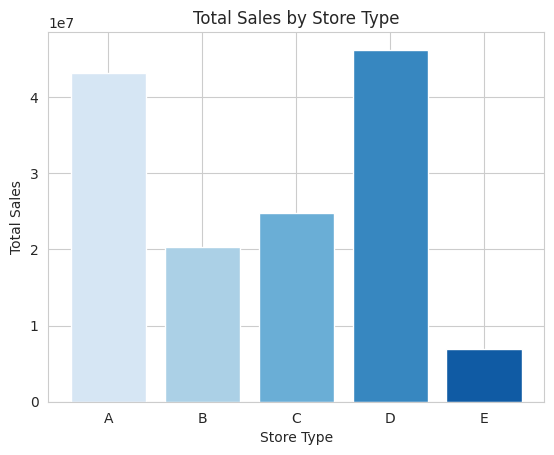

<Figure size 1500x1000 with 0 Axes>

In [369]:


# Group by store type and sum the transactions column
sales_by_type = merged.groupby('type')['transactions'].sum().reset_index()

# Set up the color gradient
colors = sns.color_palette('Blues', len(sales_by_type))
color_map = dict(zip(sales_by_type['type'], colors))

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(sales_by_type['type'], sales_by_type['transactions'], color=[color_map[type] for type in sales_by_type['type']])
plt.figure(figsize=(15,10))
ax.set_title('Total Sales by Store Type')
ax.set_xlabel('Store Type')
ax.set_ylabel('Total Sales')
plt.show();


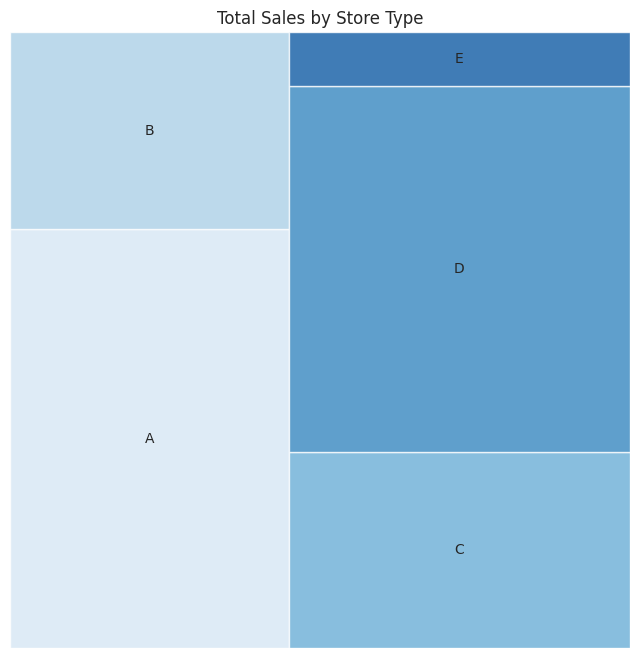

In [370]:

# Group by store type and sum the transactions column
sales_by_type = merged.groupby('type')['transactions'].sum().reset_index()

# Set up the color gradient
colors = sns.color_palette('Blues', len(sales_by_type))
color_map = dict(zip(sales_by_type['type'], colors))

# Create the treemap
fig, ax = plt.subplots(figsize=(8, 8))
squarify.plot(sizes=sales_by_type['transactions'], label=sales_by_type['type'], alpha=0.8, color=[color_map[type] for type in sales_by_type['type']])
plt.axis('off')
plt.title('Total Sales by Store Type')
plt.show()
